In [3]:
#!/usr/bin/env python3
from timeit import default_timer as timer


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# import matplotlib # inline

# files
train_df = pd.read_csv("~/Kaggle/data/train.csv").fillna("sterby")
test_df = pd.read_csv("~/Kaggle/data/test.csv").fillna("sterby")

#train and test
X_train = train_df["comment_text"].values
y_train = train_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test_df["comment_text"].values
#y_test = test_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [4]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [5]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential, Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
max_features = 20000 # numero de palabras que queremos mantener
maxlen = 100 # longitud maxima de los comentarios en el modelo
batch_size = 64 # tamano del lote para el modelo
embedding_dims = 20 # dimension de la variable oculta, es decir, la dimension de insercion

In [7]:
comment_input = Input((maxlen,))

In [11]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vecor_length, input_length=100))
model.add(LSTM(100))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 693,806
Trainable params: 693,806
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
tok = Tokenizer(num_words=max_features)
tok.fit_on_texts(list(X_train) + list(X_test))
x_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(X_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Average train sequence length: {}'.format(np.mean(list(map(len, x_train)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, x_test)), dtype=int)))

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

comment_input = Input((maxlen,))

159571 train sequences
153164 test sequences
Average train sequence length: 65
Average test sequence length: 57
x_train shape: (159571, 100)
x_test shape: (153164, 100)


In [13]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 365s 3ms/step - loss: 0.0771 - acc: 0.9762 - val_loss: 0.0533 - val_acc: 0.9813
Epoch 2/3
143613/143613 [==============================] - 335s 2ms/step - loss: 0.0487 - acc: 0.9823 - val_loss: 0.0507 - val_acc: 0.9820
Epoch 3/3
143613/143613 [==============================] - 329s 2ms/step - loss: 0.0447 - acc: 0.9833 - val_loss: 0.0511 - val_acc: 0.9821


In [16]:
train_result = model.evaluate(x_train, y_train, batch_size=batch_size, verbose=1, sample_weight=None, steps=None)
print("train_result\n",train_result)

159571/159571 [==============================] - 84s 526us/step
train_result
 [0.043291092816749359, 0.98431314613424215]


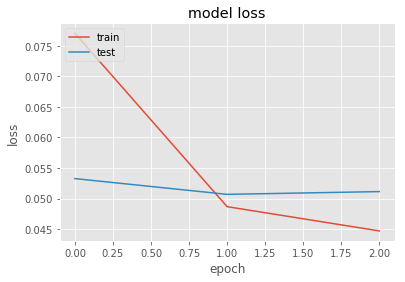

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
graph = hist
# Visualize history of loss
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Why is there only 2 epochs ? In model.fit we gived `epochs = 3̀